In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 

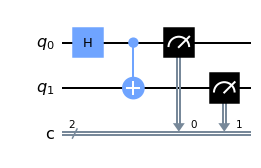

In [2]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

qc.draw(output="mpl")

{'00': 516, '11': 508}


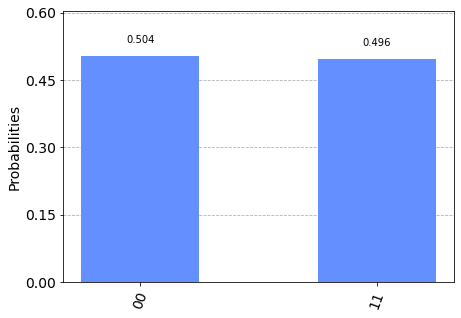

In [3]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(qc, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(qc)  
print(counts)
graph = plot_histogram(counts)
display(graph)

In [5]:
data = result.to_dict()
for key, value in data.items():
    print(key, ' : ', value)
count = data["results"][0]["data"]["counts"]
print("\n",count)

backend_name  :  qasm_simulator
backend_version  :  0.7.0
qobj_id  :  1f6fcf8f-b769-4096-8ea6-9b6388f2bbf8
job_id  :  ad9427e2-f7e9-462a-90f6-3e81e68d27f1
success  :  True
results  :  [{'shots': 1024, 'success': True, 'data': {'counts': {'0x0': 516, '0x3': 508}}, 'meas_level': <MeasLevel.CLASSIFIED: 2>, 'header': {'clbit_labels': [['c', 0], ['c', 1]], 'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit10', 'qreg_sizes': [['q', 2]], 'qubit_labels': [['q', 0], ['q', 1]]}, 'status': 'DONE', 'seed_simulator': 2209594656, 'time_taken': 0.0113826, 'metadata': {'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 4}}]
date  :  2021-04-11T13:07:52.393294
status  :  COMPLETED
header  :  {'backend_name': 'qasm_simulator', 'backend_version': '0.7.0'}
metadata  :  {'max_memory_mb': 2002, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0115482}
time_taken  :  0.0149

In [6]:
import csv

with open('data.csv', mode='w',newline='') as csv_file:
    fieldnames = ['State', 'counts']
    thewriter = csv.DictWriter(csv_file, fieldnames=fieldnames)

    thewriter.writeheader()
    i=0
    for key in count.keys():
        csv_file.write("%s,%s\n"%(i,count[key]))
        i+=1

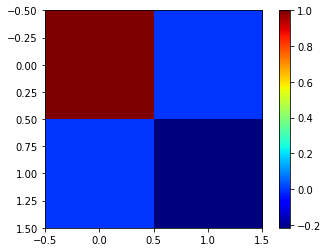

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataframe = pd.read_csv("data.csv")
x = dataframe.State
y = dataframe.count
y = x
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sinc(R)
plt.imshow(Z, cmap = "jet")
plt.colorbar()

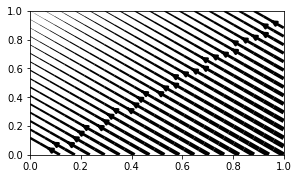

In [11]:
import matplotlib.gridspec as gridspec
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y,U,V, density=0.6, color='k', linewidth=lw)